In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Data\SCMS_Delivery_History_Dataset.csv")

In [4]:
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,C?e d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,C?e d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [5]:
df.tail()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,C?e d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03
10323,86823,103-ZW-T30,FPQ-15197,SO-50022,DN-4336,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,36639,72911.61,1.99,0.03,"Cipla, Goa, India",No,Weight Captured Separately,Freight Included in Commodity Cost,85.82


In [6]:
df.shape

(10324, 33)

In [7]:
df.nunique()

ID                              10324
Project Code                      142
PQ #                             1237
PO / SO #                        6233
ASN/DN #                         7030
Country                            43
Managed By                          4
Fulfill Via                         2
Vendor INCO Term                    8
Shipment Mode                       4
PQ First Sent to Client Date      765
PO Sent to Vendor Date            897
Scheduled Delivery Date          2006
Delivered to Client Date         2093
Delivery Recorded Date           2042
Product Group                       5
Sub Classification                  6
Vendor                             73
Item Description                  184
Molecule/Test Type                 86
Brand                              48
Dosage                             54
Dosage Form                        17
Unit of Measure (Per Pack)         31
Line Item Quantity               5065
Line Item Value                  8741
Pack Price  

In [8]:
df['PO/SO_Type'] = df['PO / SO #'].str.extract(r'(\w+)-')
df['PO/SO_Number'] = df['PO / SO #'].str.extract(r'-(\d+)').astype(float)

df['ASN_DN_Type'] = df['ASN/DN #'].str.extract(r'(\w+)-')
df['ASN_DN_Number'] = df['ASN/DN #'].str.extract(r'-(\d+)').astype(float)

df['project_code'] = df['Project Code'].str.extract(r'-([A-Z]+\d+)$')


In [9]:
df=df.drop(columns=['ID','ASN/DN #','PO / SO #','PQ #','Project Code','Item Description'])



In [10]:
df.head()

,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,...,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),PO/SO_Type,PO/SO_Number,ASN_DN_Type,ASN_DN_Number,project_code
0,C?e d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,02-Jun-06,02-Jun-06,02-Jun-06,...,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN,SCMS,4.0,ASN,8.0,T01
1,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,...,"Aurobindo Unit III, India",Yes,358,4521.5,NaN,SCMS,13.0,ASN,85.0,T01
2,C?e d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,...,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN,SCMS,20.0,ASN,14.0,T01
3,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,01-Sep-06,01-Sep-06,01-Sep-06,...,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN,SCMS,78.0,ASN,50.0,T01
4,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,...,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN,SCMS,81.0,ASN,55.0,T01


In [11]:
df=df.drop(columns=[])

In [12]:
df[["Country",'Molecule/Test Type','Vendor','Dosage Form','Unit of Measure (Per Pack)','Line Item Quantity']]

,Country,Molecule/Test Type,Vendor,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity
0,C?e d'Ivoire,"HIV, Reveal G3 Rapid HIV-1 Antibody Test",RANBAXY Fine Chemicals LTD.,Test kit,30,19
1,Vietnam,Nevirapine,Aurobindo Pharma Limited,Oral suspension,240,1000
2,C?e d'Ivoire,"HIV 1/2, Determine Complete HIV Kit",Abbott GmbH & Co. KG,Test kit,100,500
3,Vietnam,Lamivudine,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,Tablet,60,31920
4,Vietnam,Stavudine,Aurobindo Pharma Limited,Capsule,60,38000
...,...,...,...,...,...,...
10319,Zimbabwe,Lamivudine/Nevirapine/Zidovudine,SCMS from RDC,Chewable/dispersible tablet - FDC,60,166571
10320,C?e d'Ivoire,Lamivudine/Zidovudine,SCMS from RDC,Tablet - FDC,60,21072
10321,Zambia,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,SCMS from RDC,Tablet - FDC,30,514526
10322,Zimbabwe,Lamivudine/Zidovudine,SCMS from RDC,Tablet - FDC,60,17465


In [13]:
df.nunique()

Country                           43
Managed By                         4
Fulfill Via                        2
Vendor INCO Term                   8
Shipment Mode                      4
PQ First Sent to Client Date     765
PO Sent to Vendor Date           897
Scheduled Delivery Date         2006
Delivered to Client Date        2093
Delivery Recorded Date          2042
Product Group                      5
Sub Classification                 6
Vendor                            73
Molecule/Test Type                86
Brand                             48
Dosage                            54
Dosage Form                       17
Unit of Measure (Per Pack)        31
Line Item Quantity              5065
Line Item Value                 8741
Pack Price                      1175
Unit Price                       183
Manufacturing Site                88
First Line Designation             2
Weight (Kilograms)              4688
Freight Cost (USD)              6733
Line Item Insurance (USD)       6722
P

In [14]:
df.duplicated().sum()

np.int64(4)

In [15]:
df = df.drop_duplicates()

In [16]:
# Clean 'Weight (Kilograms)', 'Freight Cost (USD)' columns
import re
columns_to_clean = ['Weight (Kilograms)', 'Freight Cost (USD)']

In [17]:
# Define regular expression patterns for valid numerical values
pattern = r'^[-+]?\d*\.?\d+$'

In [18]:
# Iterate over the columns and clean the inconsistent values
for column in columns_to_clean:
    df[column] = df[column].apply(lambda x: re.sub(pattern, '', str(x)) if not re.match(pattern, str(x)) else x)

In [19]:
# Convert the columns back to numeric data type
df[columns_to_clean] = df[columns_to_clean].apply(pd.to_numeric, errors='coerce')

In [20]:
df.isnull().sum()

Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Molecule/Test Type                 0
Brand                              0
Dosage                          1734
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
Unit Price                         0
Manufacturing Site                 0
First Line Designation             0
Weight (Kilograms)              3948
Freight Cost (USD)              4122
Line Item Insurance (USD)        287
P

In [21]:
df["Shipment Mode"] = df.groupby("Country")["Shipment Mode"].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else "Unknown"))


In [22]:
## fill based on ASN/DN
mean_value1 = df.groupby('Vendor')['Weight (Kilograms)'].transform('mean')
df['Weight (Kilograms)'].fillna(mean_value1, inplace=True)
mean_value2 = df.groupby('Vendor')['Freight Cost (USD)'].transform('mean')
df['Freight Cost (USD)'].fillna(mean_value2, inplace=True)
mean_value3 = df.groupby('Shipment Mode')['Line Item Insurance (USD)'].transform('mean')
df['Line Item Insurance (USD)'].fillna(mean_value3, inplace=True)



In [23]:
df.isnull().sum()[df.isnull().sum() > 0]

Dosage                1734
Weight (Kilograms)    1114
Freight Cost (USD)     398
dtype: int64

In [24]:
df=df.drop(columns=['Dosage'])



In [25]:
df.dropna(inplace=True)

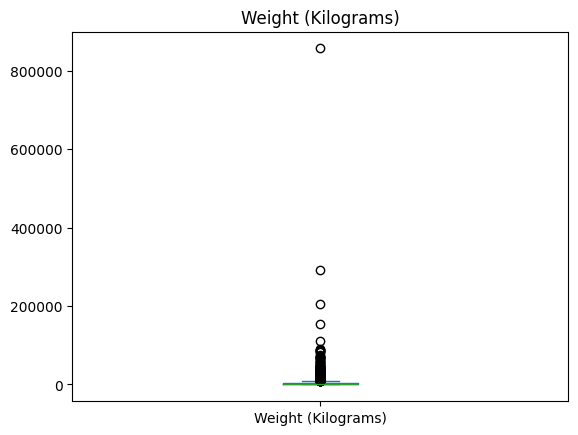

In [26]:
df['Weight (Kilograms)'].plot(kind='box', title='Weight (Kilograms)')
plt.show()

In [27]:
## Winsorization method

from scipy.stats.mstats import winsorize

def treat_outliers_winsorize(series, limits=(0.1, 0.1)):
    return winsorize(series, limits=limits)


In [28]:
df["Weight (Kilograms)"] = treat_outliers_winsorize(df["Weight (Kilograms)"])

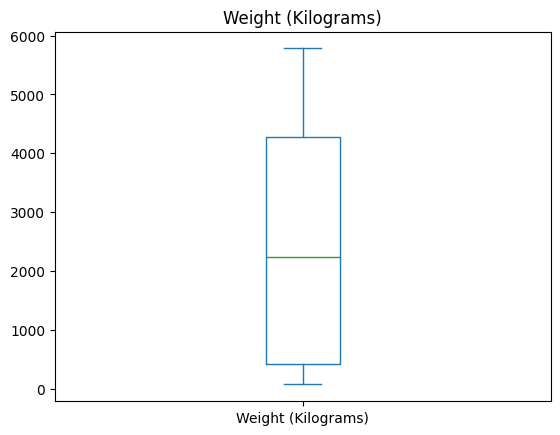

In [29]:
df['Weight (Kilograms)'].plot(kind='box', title='Weight (Kilograms)')
plt.show()

In [30]:
## IQR method
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series.clip(lower, upper)



In [31]:

df["Freight Cost (USD)"] = cap_outliers(df["Freight Cost (USD)"])


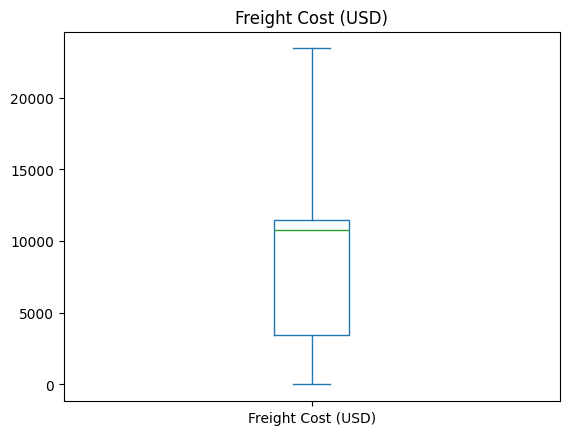

In [32]:
df['Freight Cost (USD)'].plot(kind='box', title='Freight Cost (USD)')
plt.show()

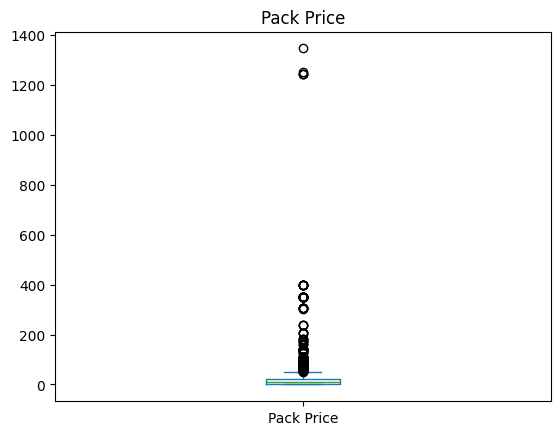

In [33]:
df['Pack Price'].plot(kind='box', title='Pack Price')
plt.show()

In [34]:
# Log Transformation (Skew Reduction, not removal) method

df["Pack Price"] = np.log1p(df["Pack Price"])  # log(1 + x)

In [35]:
df["Unit of Measure (Per Pack)"] = np.log1p(df["Unit of Measure (Per Pack)"])  # log(1 + x)

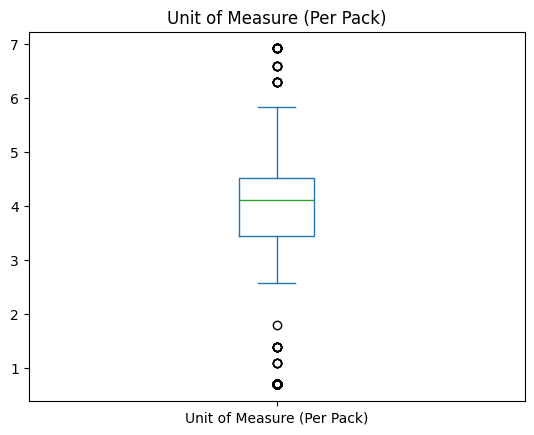

In [36]:
df['Unit of Measure (Per Pack)'].plot(kind='box', title='Unit of Measure (Per Pack)')
plt.show()

In [37]:

df["Line Item Quantity"] = cap_outliers(df["Line Item Quantity"])

df["Line Item Value"] = cap_outliers(df["Line Item Value"])

df["Unit Price"] = cap_outliers(df["Unit Price"])


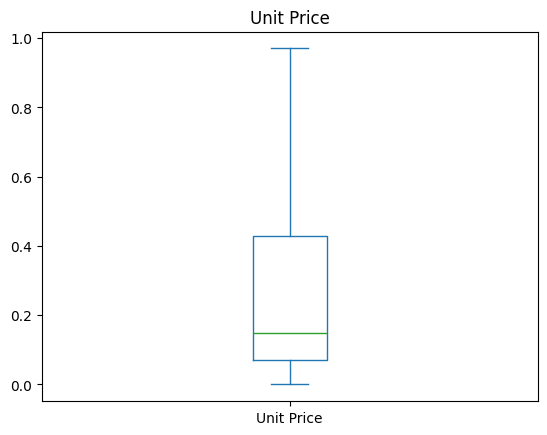

In [38]:
df["Unit Price"].plot(kind='box', title='Unit Price')
plt.show()

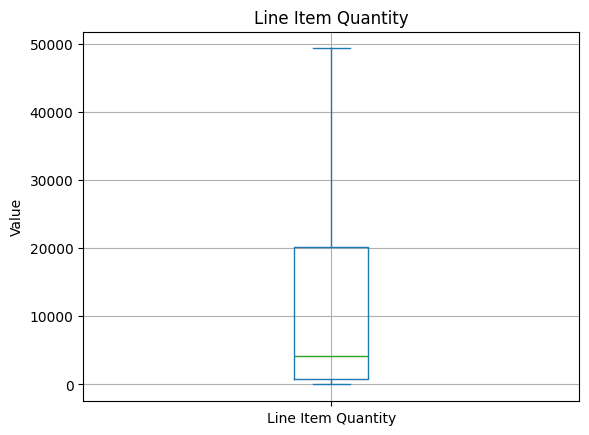

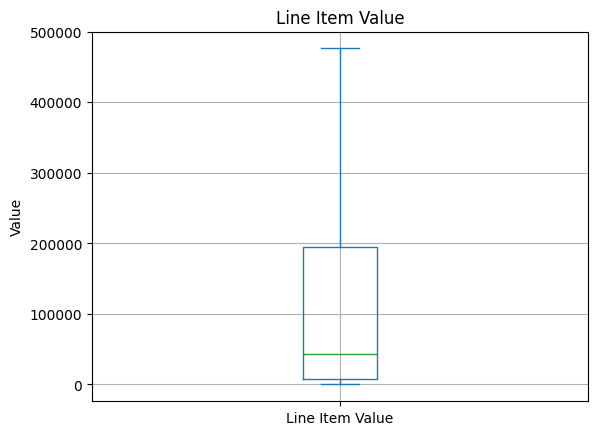

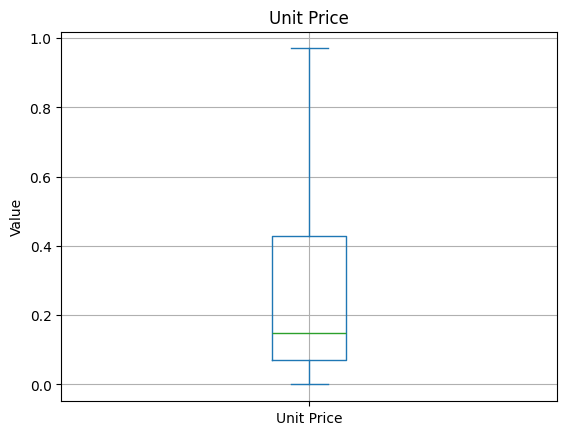

In [39]:
df['Line Item Quantity'].plot(kind='box', title='Line Item Quantity')
plt.ylabel("Value")
plt.grid(True)
plt.show()

df['Line Item Value'].plot(kind='box', title='Line Item Value')
plt.ylabel("Value")
plt.grid(True)
plt.show()

df['Unit Price'].plot(kind='box', title='Unit Price')
plt.ylabel("Value")
plt.grid(True)
plt.show()


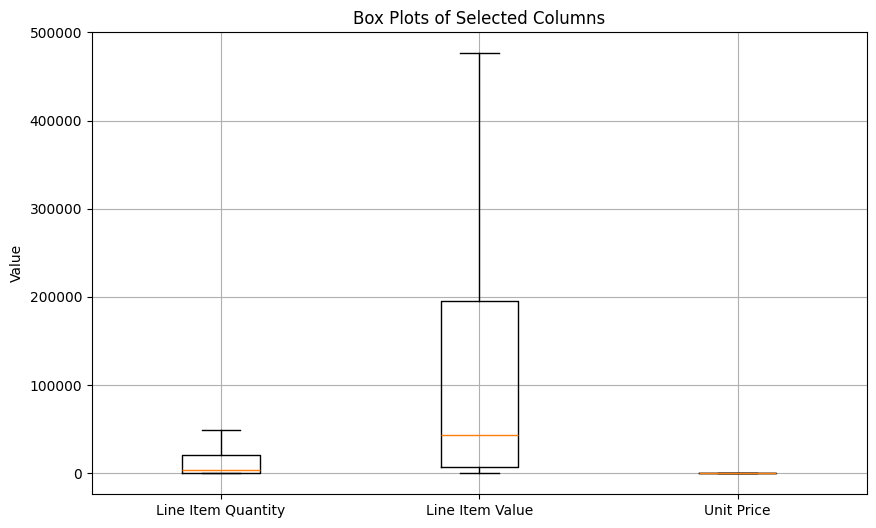

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Combine selected columns into a list of arrays
plt.boxplot([df["Line Item Quantity"], df["Line Item Value"], df["Unit Price"]])

# Set x-axis labels
plt.xticks([1, 2, 3], ["Line Item Quantity", "Line Item Value", "Unit Price"])
plt.title("Box Plots of Selected Columns")
plt.ylabel("Value")
plt.grid(True)
plt.show()


In [41]:
####  Box-Cox / Yeo-Johnson Transformations
# from sklearn.preprocessing import PowerTransformer

# pt = PowerTransformer(method='yeo-johnson')
# df['Unit of Measure (Per Pack)'] = pt.fit_transform(df[['Unit of Measure (Per Pack)']])


In [42]:
target_column=["Freight Cost (USD)"]
X = df.drop(columns=target_column)
y = df[target_column]


In [43]:
# Sample high-cardinality or ID-like columns
columns_to_exclude_from_numerical = ['PO/SO_Number', 'ASN_DN_Number']

# Step 1: Separate numerical and categorical columns
numerical_cols = X.select_dtypes(include=[np.number])
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Step 2: Remove the unwanted columns from numerical
numerical_cols_filtered = [col for col in numerical_cols if col not in columns_to_exclude_from_numerical]

# Step 3: If you want, you can also append them to the categorical list
for col in columns_to_exclude_from_numerical:
    if col not in categorical_cols and col in X.columns:
        categorical_cols.append(col)

# Get numerical data after excluding high-cardinality columns
X_numerical = X[numerical_cols_filtered]

# Get categorical data 
X_categorical = X[categorical_cols]




In [44]:
print("Numerical DataFrame shape:", X_numerical.shape)
print("Categorical DataFrame shape:", X_categorical.shape)


Numerical DataFrame shape: (9205, 7)
Categorical DataFrame shape: (9205, 23)


In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numerical)  # Normalize


In [46]:
X_numerical

,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Weight (Kilograms),Line Item Insurance (USD)
0,3.433987,19,551.00,3.401197,0.97,75.000000,162.179199
1,5.484797,1000,6200.00,1.974081,0.03,358.000000,162.179199
2,4.615121,500,40000.00,4.394449,0.80,171.000000,162.179199
3,4.110874,31920,127360.80,1.607436,0.07,1855.000000,162.179199
4,4.110874,38000,121600.00,1.435085,0.05,5780.000000,162.179199
...,...,...,...,...,...,...,...
10319,4.110874,49293,476269.92,1.526056,0.06,4270.686456,705.790000
10320,4.110874,21072,137389.44,2.017566,0.11,4270.686456,161.710000
10321,3.433987,49293,476269.92,2.396986,0.33,4270.686456,5284.040000
10322,4.110874,17465,113871.80,2.017566,0.11,1392.000000,134.030000


In [47]:
.

SyntaxError: invalid syntax (1933637684.py, line 1)

In [ ]:
X_scaled

array([[-0.79986683, -0.77145596, -0.78196217, ...,  2.08459268,
        -1.20058413, -0.20052307],
       [ 1.85009526, -0.7149903 , -0.74630855, ..., -0.868038  ,
        -1.05962634, -0.20052307],
       [ 0.72633936, -0.74376994, -0.53298007, ...,  1.55060628,
        -1.15276806, -0.20052307],
       ...,
       [-0.79986683,  2.06472008,  2.22053458, ...,  0.07429094,
         0.88922036,  9.72908384],
       [ 0.07477501,  0.23272327, -0.06673871, ..., -0.61675028,
        -0.54460744, -0.25509512],
       [ 0.07477501,  1.33636493, -0.32525867, ..., -0.868038  ,
         0.88922036, -0.34855849]], shape=(9205, 7))

In [48]:
#  1. Variance Threshold (remove low variance features)

from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=10)  # Lower if normalized
X_selected = selector.fit_transform(X_numerical)
selected_var_cols = X_numerical.columns[selector.get_support()]
print("Selected columns (Variance):", selected_var_cols.tolist())


Selected columns (Variance): ['Line Item Quantity', 'Line Item Value', 'Weight (Kilograms)', 'Line Item Insurance (USD)']


In [49]:
### 2. Correlation-Based Feature Selection

# Fix target to be a 1D Series
y = y.squeeze()

# Compute correlation of each numerical feature in X with the target y
target_corr = X_numerical.apply(lambda col: col.corr(y)).abs().sort_values(ascending=False)

# Select features with correlation above a threshold (e.g., 0.1)
selected_features = target_corr[target_corr > 0.1].index.tolist()

# Optional: print correlation values
print(target_corr)
print(selected_features)

Weight (Kilograms)            0.576041
Line Item Value               0.451519
Line Item Quantity            0.366381
Line Item Insurance (USD)     0.320450
Unit of Measure (Per Pack)    0.048745
Pack Price                    0.035017
Unit Price                    0.010653
dtype: float64
['Weight (Kilograms)', 'Line Item Value', 'Line Item Quantity', 'Line Item Insurance (USD)']


In [50]:
### 3. Mutual Information Regression
from sklearn.feature_selection import mutual_info_regression

mi_scores = mutual_info_regression(X_numerical, y)
mi_series = pd.Series(mi_scores, index=X_numerical.columns).sort_values(ascending=False)

threshold = 0.01  # you can experiment with this value
selected_features = mi_series[mi_series > threshold].index.tolist()


In [51]:

mi_series

Weight (Kilograms)            1.134103
Pack Price                    0.495571
Unit Price                    0.324731
Line Item Value               0.296974
Line Item Quantity            0.285775
Line Item Insurance (USD)     0.261635
Unit of Measure (Per Pack)    0.193622
dtype: float64

In [52]:
selected_features

['Weight (Kilograms)',
 'Pack Price',
 'Unit Price',
 'Line Item Value',
 'Line Item Quantity',
 'Line Item Insurance (USD)',
 'Unit of Measure (Per Pack)']

In [53]:
### 4. Recursive Feature Elimination (RFE)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X_numerical, y)

selected = X_numerical.columns[rfe.support_]


In [54]:
selected

Index(['Unit of Measure (Per Pack)', 'Pack Price', 'Unit Price',
       'Weight (Kilograms)', 'Line Item Insurance (USD)'],
      dtype='object')

In [55]:
### 5. Lasso Regularization (L1)

from sklearn.linear_model import LassoCV

lasso = LassoCV().fit(X_numerical, y)
selected_from_lasso = X_numerical.columns[(lasso.coef_ != 0)]


In [56]:
selected_from_lasso

Index(['Line Item Quantity', 'Line Item Value', 'Weight (Kilograms)'], dtype='object')

In [57]:
### 6. Tree-Based Feature Importance

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor().fit(X_numerical, y)
importances = pd.Series(rf.feature_importances_, index=X_numerical.columns).sort_values(ascending=False)


# Example: Select features with importance > 0.01 (adjust threshold as needed)
selected_features = importances[importances > 0.01].index.tolist()

print("Selected columns based on importance:\n", selected_features)

Selected columns based on importance:
 ['Weight (Kilograms)', 'Line Item Insurance (USD)', 'Unit Price', 'Pack Price', 'Line Item Quantity', 'Line Item Value', 'Unit of Measure (Per Pack)']


In [ ]:
###  7. Permutation Importance

from sklearn.inspection import permutation_importance

model = RandomForestRegressor().fit(X_numerical, y)
result = permutation_importance(model, X_numerical, y, n_repeats=10)

perm_scores = pd.Series(result.importances_mean, index=X_numerical.columns).sort_values(ascending=False)

In [ ]:
perm_scores

Weight (Kilograms)            1.056511
Line Item Insurance (USD)     0.251485
Unit Price                    0.234373
Line Item Quantity            0.231607
Pack Price                    0.196725
Line Item Value               0.193042
Unit of Measure (Per Pack)    0.047957
dtype: float64

In [ ]:
### 8. SelectKBest / SelectPercentile

from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X_numerical, y)


In [ ]:
X_selected

array([[3.43398720e+00, 1.90000000e+01, 5.51000000e+02, ...,
        9.70000000e-01, 7.50000000e+01, 1.62179199e+02],
       [5.48479693e+00, 1.00000000e+03, 6.20000000e+03, ...,
        3.00000000e-02, 3.58000000e+02, 1.62179199e+02],
       [4.61512052e+00, 5.00000000e+02, 4.00000000e+04, ...,
        8.00000000e-01, 1.71000000e+02, 1.62179199e+02],
       ...,
       [3.43398720e+00, 4.92930000e+04, 4.76269920e+05, ...,
        3.30000000e-01, 4.27068646e+03, 5.28404000e+03],
       [4.11087386e+00, 1.74650000e+04, 1.13871800e+05, ...,
        1.10000000e-01, 1.39200000e+03, 1.34030000e+02],
       [4.11087386e+00, 3.66390000e+04, 7.29116100e+04, ...,
        3.00000000e-02, 4.27068646e+03, 8.58200000e+01]], shape=(9205, 7))

In [ ]:
###  9. Boruta (Wrapper method using RandomForest)

from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_jobs=-1, max_depth=5)
boruta = BorutaPy(estimator=rf, n_estimators='auto', verbose=0, random_state=42)
boruta.fit(X_numerical.values, y.values)


,estimator,RandomForestR...0x2715EB41F40)
,n_estimators,'auto'
,perc,100
,alpha,0.05
,two_step,True
,max_iter,100
,random_state,RandomState(M... 0x2715EB41F40
,verbose,0
,early_stopping,False
,n_iter_no_change,20
,n_estimators,74


In [ ]:
# Get selected feature names
selected_columns = X_numerical.columns[boruta.support_].tolist()

# Get rejected feature names
rejected_columns = X_numerical.columns[~boruta.support_].tolist()

print("✅ Selected Features:", selected_columns)
print("❌ Rejected Features:", rejected_columns)


✅ Selected Features: ['Unit of Measure (Per Pack)', 'Line Item Quantity', 'Line Item Value', 'Pack Price', 'Unit Price', 'Weight (Kilograms)', 'Line Item Insurance (USD)']
❌ Rejected Features: []


In [ ]:
#### 10.shap method

import shap

model = RandomForestRegressor().fit(X, y)
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

shap.summary_plot(shap_values, X)


ModuleNotFoundError: No module named 'shap'

In [ ]:
###  11. PCA (for dimensionality reduction, not strictly feature selection)
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_numerical, random_state=42)



In [ ]:
X_pca

array([[-1.24600617e+05, -2.83156628e+03, -1.42674673e+03,
         2.20886023e+02,  8.70871542e-01],
       [-1.18886633e+05, -2.32331282e+03, -1.21357670e+03,
         2.04395618e+02, -8.00555969e-01],
       [-8.52559436e+04, -5.73863024e+03, -1.39117109e+03,
         1.28300520e+02,  1.51512773e+00],
       ...,
       [ 3.53619536e+05,  5.53969131e+03, -8.23001649e+02,
         4.13219289e+03, -2.87548735e-01],
       [-1.01956726e+04,  4.85591397e+03, -1.35271177e+03,
        -1.07435831e+02, -3.26303494e-01],
       [-4.93419254e+04,  2.76284722e+04,  2.75189743e+02,
        -1.11865006e+02,  4.42622821e-01]], shape=(9205, 5))

In [ ]:
## ✅ 1. ANOVA F-test (for regression target)

from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder

X_encoded = X_categorical.apply(LabelEncoder().fit_transform)

f_scores, p_values = f_classif(X_encoded, y)
f_series = pd.Series(f_scores, index=X_categorical.columns)



In [ ]:
selected_features = [col for col, p in zip(X_categorical.columns, p_values) if p < 0.05]


In [ ]:
len(selected_features)

23

In [ ]:
print(f_series.sort_values(ascending=False))


Managed By                            inf
Vendor                          13.653856
PO/SO_Type                       9.865888
Fulfill Via                      9.855390
ASN_DN_Type                      9.855390
Vendor INCO Term                 8.212084
Product Group                    5.087116
Brand                            4.661492
PO Sent to Vendor Date           4.344793
First Line Designation           3.809935
ASN_DN_Number                    3.393077
PO/SO_Number                     2.806237
Dosage Form                      2.164048
Manufacturing Site               1.654422
project_code                     1.558004
Country                          1.525578
Shipment Mode                    1.439026
PQ First Sent to Client Date     1.380082
Delivery Recorded Date           1.344867
Scheduled Delivery Date          1.331209
Delivered to Client Date         1.321483
Sub Classification               1.316497
Molecule/Test Type               1.172388
dtype: float64


In [ ]:
###  2. Mutual Information for Classification
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder

X_encoded = X_categorical.apply(LabelEncoder().fit_transform)
# y_encoded = LabelEncoder().fit_transform(y) if y.dtype == 'object' else y

mi_scores = mutual_info_regression(X_encoded, y)
mi_series = pd.Series(mi_scores, index=X_categorical.columns).sort_values(ascending=False)

selected_features = mi_series[mi_series > 0.01].index.tolist()

print(mi_series)
print("Selected features:", selected_features)
len(selected_features)

PO/SO_Number                    0.714941
ASN_DN_Number                   0.655170
Delivery Recorded Date          0.556657
PQ First Sent to Client Date    0.552779
Delivered to Client Date        0.552422
Vendor                          0.522090
Scheduled Delivery Date         0.506406
PO Sent to Vendor Date          0.455095
First Line Designation          0.440397
Country                         0.398636
Manufacturing Site              0.365209
Molecule/Test Type              0.354291
Vendor INCO Term                0.336968
Fulfill Via                     0.256905
Brand                           0.255797
PO/SO_Type                      0.242495
ASN_DN_Type                     0.240661
Dosage Form                     0.215744
Shipment Mode                   0.206619
Sub Classification              0.156992
Product Group                   0.111633
project_code                    0.046396
Managed By                      0.000000
dtype: float64
Selected features: ['PO/SO_Number', 'ASN_D

22

In [ ]:
###  3. Chi-Square Test (for classification target)
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Encode categorical features and target
X_encoded = X_categorical.apply(LabelEncoder().fit_transform)
y_encoded = LabelEncoder().fit_transform(y)

# Chi-square test
chi_scores, p_values = chi2(X_encoded, y_encoded)

# Convert to Series
chi_series = pd.Series(chi_scores, index=X_categorical.columns)
selected_features = chi_series[chi_series > threshold].index.tolist()


In [ ]:
### 4. Target Encoding + Correlation (for regression)

import category_encoders as ce

encoder = ce.TargetEncoder()
X_encoded = encoder.fit_transform(X_categorical, y)

correlations = X_encoded.corrwith(y)
selected_features = correlations[abs(correlations) > 0.05].index.tolist()


ModuleNotFoundError: No module named 'category_encoders'

In [ ]:
import pandas as pd

# Target encoding
X_target_encoded = X_categorical.apply(lambda col: col.map(y.groupby(col).mean()))

# Correlation
corr = X_target_encoded.corrwith(y).abs().sort_values(ascending=False)

# Select features
threshold = 0.1
selected_features = corr[corr > threshold].index.tolist()

print(corr)
print("Selected features:", len(selected_features))

ASN_DN_Number                   0.907694
PO/SO_Number                    0.906623
Scheduled Delivery Date         0.625554
Delivery Recorded Date          0.618825
Delivered to Client Date        0.618357
PQ First Sent to Client Date    0.552895
PO Sent to Vendor Date          0.541214
Molecule/Test Type              0.413417
Manufacturing Site              0.379041
Vendor                          0.347445
Brand                           0.325670
Country                         0.302419
Dosage Form                     0.229114
Vendor INCO Term                0.209547
Shipment Mode                   0.189917
Sub Classification              0.150146
First Line Designation          0.140302
project_code                    0.124066
Product Group                   0.082430
PO/SO_Type                      0.024242
Fulfill Via                     0.015866
ASN_DN_Type                     0.015866
Managed By                      0.007550
dtype: float64
Selected features: 18


In [ ]:
###  5. Tree-based Feature Importance (model-agnostic)

from sklearn.ensemble import RandomForestRegressor

X_encoded = X_categorical.apply(LabelEncoder().fit_transform)
model = RandomForestRegressor()
model.fit(X_encoded, y)

importances = pd.Series(model.feature_importances_, index=X_encoded.columns)
features_from_rfr = importances[importances > 0.01].index.tolist()


In [ ]:
features_from_rfr

['Country',
 'Shipment Mode',
 'PQ First Sent to Client Date',
 'PO Sent to Vendor Date',
 'Scheduled Delivery Date',
 'Delivered to Client Date',
 'Delivery Recorded Date',
 'Sub Classification',
 'Vendor',
 'Molecule/Test Type',
 'Brand',
 'Dosage Form',
 'Manufacturing Site',
 'First Line Designation',
 'PO/SO_Number',
 'ASN_DN_Number']

In [ ]:
len(features_from_rfr)

16

In [ ]:
###  6. CatBoost Feature Importance
from catboost import CatBoostRegressor, Pool
import pandas as pd

# Ensure all categorical features are strings
X_categorical_str = X_categorical.astype(str)
# Categorical indices
cat_features_idx = list(range(X_categorical_str.shape[1]))

# Model
model = CatBoostRegressor(verbose=0)
model.fit(X_categorical_str, y, cat_features=cat_features_idx)

# Importance
importances = pd.Series(model.get_feature_importance(), index=X_categorical.columns).sort_values(ascending=False)

print(importances)



Country                         16.062629
Molecule/Test Type              12.732524
First Line Designation          11.792654
PQ First Sent to Client Date     6.819598
Shipment Mode                    5.758632
PO/SO_Number                     4.715643
Dosage Form                      4.412139
Vendor                           4.205146
PO/SO_Type                       3.790496
PO Sent to Vendor Date           3.677889
Vendor INCO Term                 3.646792
Sub Classification               3.504571
Manufacturing Site               2.832300
project_code                     2.824077
Delivered to Client Date         2.816025
Product Group                    2.598689
Delivery Recorded Date           2.235221
Brand                            2.167833
Scheduled Delivery Date          2.078284
ASN_DN_Number                    1.211669
Fulfill Via                      0.069013
ASN_DN_Type                      0.048176
Managed By                       0.000000
dtype: float64


In [ ]:
cumulative_importance = importances.cumsum() / importances.sum()
features_from_catboost = cumulative_importance[cumulative_importance <= 0.9].index.tolist()
print("Selected features:", len(features_from_catboost))


Selected features: 15


In [59]:
### 📌 8. Boruta with RandomForest

from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Encode categorical
X_encoded = X_categorical.apply(LabelEncoder().fit_transform)

# Boruta
rf = RandomForestRegressor(n_jobs=-1, max_depth=5)
boruta = BorutaPy(estimator=rf, n_estimators='auto', verbose=0, random_state=42)
boruta.fit(X_encoded.values, y.values)

# Selected columns
features_from_boruta = X_categorical.columns[boruta.support_].tolist()
print("Selected features:", features_from_boruta)


Selected features: ['Country', 'Vendor INCO Term', 'Shipment Mode', 'PO Sent to Vendor Date', 'Scheduled Delivery Date', 'Vendor', 'Molecule/Test Type', 'Brand', 'Dosage Form', 'Manufacturing Site', 'First Line Designation', 'PO/SO_Number', 'ASN_DN_Number']


In [60]:
len(features_from_boruta)

13

In [61]:
features_from_union = list(set(
    features_from_rfr +
    features_from_boruta +
    features_from_catboost
))
print(features_from_union)
# ['Country', 'Shipment Mode', 'Brand', 'Price', 'Vendor', 'Quantity', 'Molecule/Test Type']


NameError: name 'features_from_rfr' is not defined

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Make a copy so we don't overwrite original
X_encoded = X.copy()

# Encode all categorical columns
for col in X_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))

# Try different feature sets
for feature_set in [features_from_rfr, features_from_boruta, features_from_union]:
    X_subset = X_encoded[feature_set]
    score = cross_val_score(
        RandomForestRegressor(random_state=42),
        X_subset,
        y,
        cv=5,
        scoring='r2'
    ).mean()
    print(f"{len(feature_set)} features → R²: {score:.4f}")


16 features → R²: 0.3468
13 features → R²: 0.3539
19 features → R²: 0.3458


In [ ]:
# Combine numerical + best categorical features
final_features = numerical_features + features_from_boruta  # or whichever selection method wins

X_final = X[final_features]

# Encode categoricals
from sklearn.preprocessing import LabelEncoder
X_encoded = X_final.copy()
for col in features_from_boruta:
    X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col])

# Train and evaluate
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

score = cross_val_score(RandomForestRegressor(random_state=42),
                        X_encoded, y, cv=5, scoring='r2').mean()

print("Final R² with numerical + selected categoricals:", score)


In [66]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# --------------------
# Assume you already have:
# --------------------
# X_numerical -> your processed numerical features
# X_categorical -> your processed categorical features
# selected_num_features_other -> list of numerical features from other method (4 features)
# selected_cat_features -> categorical feature list (e.g., from Boruta)
# y -> target

# 2️⃣ Other method's numerical set
X_other_num = X_numerical[selected_from_lasso]

# 3️⃣ Compare R² for numerical sets
scores = {}
scores["PCA (5 comps)"] = cross_val_score(
    RandomForestRegressor(random_state=42),
    X_pca, y, cv=5, scoring='r2'
).mean()

scores["lasso method (4 feats)"] = cross_val_score(
    RandomForestRegressor(random_state=42),
    X_other_num, y, cv=5, scoring='r2'
).mean()

print("Numerical only comparison:")
for name, score in scores.items():
    print(f"{name} → R²: {round(score, 4)}")

# 4️⃣ Pick better numerical method
best_num_method = max(scores, key=scores.get)
print(f"\nBest numerical set: {best_num_method}")

if best_num_method == "PCA (5 comps)":
    X_num_best = pd.DataFrame(X_pca, index=X_numerical.index)
else:
    X_num_best = X_other_num.copy()

# 5️⃣ Combine with categorical features
X_cat_selected = X_categorical[features_from_boruta].copy()

# Encode categorical features
for col in X_cat_selected.columns:
    X_cat_selected[col] = LabelEncoder().fit_transform(X_cat_selected[col].astype(str))

# Merge numerical + categorical
X_final = pd.concat([X_num_best, X_cat_selected], axis=1)

# Make all column names strings
X_final.columns = X_final.columns.astype(str)


# 6️⃣ Final model R²
final_score = cross_val_score(
    RandomForestRegressor(random_state=42),
    X_final, y, cv=5, scoring='r2'
).mean()

print(f"\nFinal model with best numerical + categorical features → R²: {round(final_score, 4)}")


Numerical only comparison:
PCA (5 comps) → R²: 0.4899
lasso method (4 feats) → R²: 0.4671

Best numerical set: PCA (5 comps)

Final model with best numerical + categorical features → R²: 0.6463


In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# 1️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42
)

# # 2️⃣ Train Random Forest
# rf_model = RandomForestRegressor(
#     n_estimators=200,          # number of trees
#     max_depth=None,            # no max depth limit
#     random_state=42,
#     n_jobs=-1                  # use all CPU cores
# )
# rf_model.fit(X_train, y_train)

from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'max_features': ['sqrt', 0.8],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestRegressor(), params, cv=3, scoring='neg_mean_absolute_error')
grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)

best_model = grid.best_estimator_


# 3️⃣ Predictions
y_pred = best_model.predict(X_test)

# 4️⃣ Evaluation
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"RandomForestRegressor R² score: {r2:.4f}")
print(f"RandomForestRegressor RMSE: {rmse:.4f}")

# 5️⃣ (Optional) Feature importance
importances = best_model.feature_importances_
feat_importances = sorted(zip(X_final.columns, importances), key=lambda x: x[1], reverse=True)

print("\nTop 10 important features:")
for name, score in feat_importances[:10]:
    print(f"{name}: {score:.4f}")


Best Params: {'max_depth': None, 'max_features': 0.8, 'min_samples_split': 2, 'n_estimators': 200}
RandomForestRegressor R² score: 0.7195
RandomForestRegressor RMSE: 3530.3397

Top 10 important features:
2: 0.4017
0: 0.1187
1: 0.0624
3: 0.0564
ASN_DN_Number: 0.0426
Shipment Mode: 0.0413
PO/SO_Number: 0.0410
Country: 0.0408
Dosage Form: 0.0351
4: 0.0318
